In [11]:
import pickle as pl
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter

In [12]:
K = [5, 10, 15, 20, 25, 30]

In [13]:
%matplotlib inline

In [14]:
def read(NAME):
    mean_absolute_error = pl.load(open(NAME + "/mean_absolute_error.pkl", "rb"))
    privacy_risk = pl.load(open(NAME + "/privacy_risk.pkl", "rb"))
    fraction_vulnerables = pl.load(open(NAME + "/fraction_vulnerables.pkl", "rb"))
    
    return {"mean_absolute_error": mean_absolute_error, "privacy_risk": privacy_risk, "fraction_vulnerables": fraction_vulnerables}

ml100k = read("ml-100k")
ml1m = read("ml-1m")
douban = read("douban")
lfm = read("lfm")
ciao = read("ciao")
goodreads = read("goodreads")

In [15]:
def print_frac_vulnerables(data, k_idx=1):
    print("UserKNN: %.2f" % (data["UserKNN"][k_idx] * 100))
    print("UserKNN_DP: %.2f" % (data["UserKNN_DP"][k_idx] * 100))
    print("UserKNN_Static_DP: %.2f" % (data["UserKNN_Static_DP"][k_idx] * 100))
    print("UserKNN_Dynamic_DP: %.2f" % (data["UserKNN_Dynamic_DP"][k_idx] * 100))

print("=== MovieLens 100k ===")
print_frac_vulnerables(ml100k["fraction_vulnerables"], k_idx=1)
print()
    
print("=== MovieLens 1M ===")
print_frac_vulnerables(ml1m["fraction_vulnerables"], k_idx=1)
print()

print("=== Douban ===")
print_frac_vulnerables(douban["fraction_vulnerables"], k_idx=1)
print()

print("=== LastFM ===")
print_frac_vulnerables(lfm["fraction_vulnerables"], k_idx=1)
print()

print("=== Ciao ===")
print_frac_vulnerables(ciao["fraction_vulnerables"], k_idx=1)
print()

print("=== Goodreads ===")
print_frac_vulnerables(goodreads["fraction_vulnerables"], k_idx=1)
print()

=== MovieLens 100k ===
UserKNN: 0.00
UserKNN_DP: 31.39
UserKNN_Static_DP: 12.41
UserKNN_Dynamic_DP: 29.69

=== MovieLens 1M ===
UserKNN: 0.00
UserKNN_DP: 40.73
UserKNN_Static_DP: 23.73
UserKNN_Dynamic_DP: 37.88

=== Douban ===
UserKNN: 0.00
UserKNN_DP: 60.37
UserKNN_Static_DP: 44.47
UserKNN_Dynamic_DP: 55.70

=== LastFM ===
UserKNN: 0.00
UserKNN_DP: 85.22
UserKNN_Static_DP: 62.30
UserKNN_Dynamic_DP: 82.67

=== Ciao ===
UserKNN: 0.00
UserKNN_DP: 2.42
UserKNN_Static_DP: 0.37
UserKNN_Dynamic_DP: 2.43

=== Goodreads ===
UserKNN: 0.00
UserKNN_DP: 26.03
UserKNN_Static_DP: 5.44
UserKNN_Dynamic_DP: 25.69



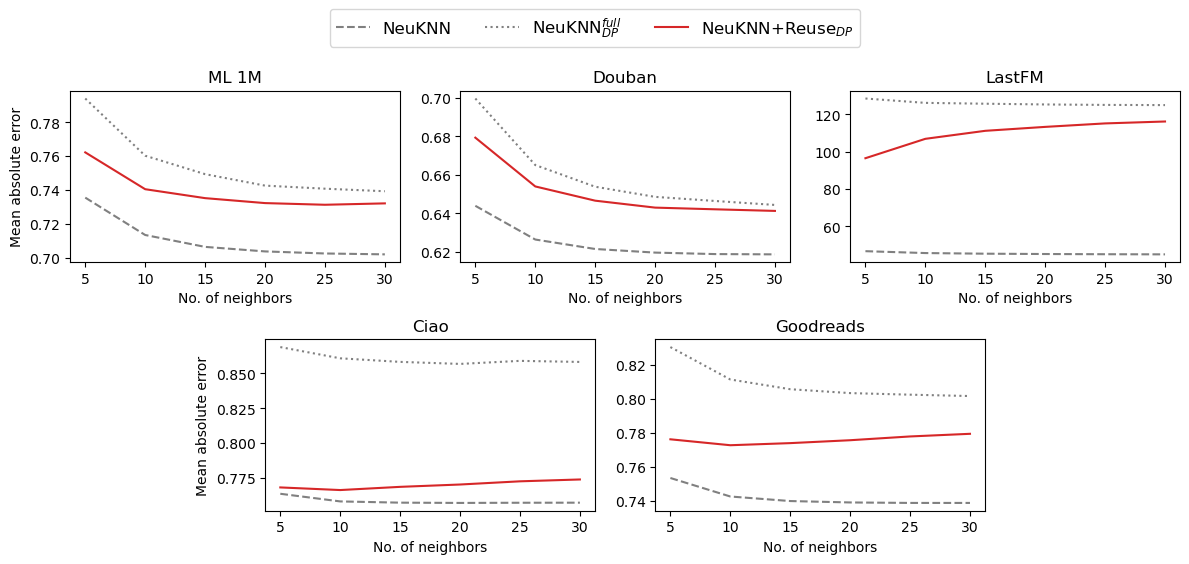

In [16]:
def plot(ax, data): 
    ax.plot(K, data["UserKNN"], color="gray", linestyle="dashed")
    ax.plot(K, data["Full_DP"], color="gray", linestyle="dotted")
    #ax.plot(K, data["UserKNN_DP"], color="C0")
    #ax.plot(K, data["UserKNN_Static_DP"], color="C1")
    ax.plot(K, data["UserKNN_Dynamic_DP"], color="C3")

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=fig)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2, fig=fig)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2, fig=fig)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2, fig=fig)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2, fig=fig)
axes = [ax1, ax2, ax3, ax4, ax5]

plot(axes[0], ml1m["mean_absolute_error"])
plot(axes[1], douban["mean_absolute_error"])
plot(axes[2], lfm["mean_absolute_error"])
plot(axes[3], ciao["mean_absolute_error"])
plot(axes[4], goodreads["mean_absolute_error"])

axes[0].set_ylabel("Mean absolute error")
axes[3].set_ylabel("Mean absolute error")

axes[0].set_xlabel("No. of neighbors")
axes[1].set_xlabel("No. of neighbors")
axes[2].set_xlabel("No. of neighbors")
axes[3].set_xlabel("No. of neighbors")
axes[4].set_xlabel("No. of neighbors")
axes[0].set_title("ML 1M")
axes[1].set_title("Douban")
axes[2].set_title("LastFM")
axes[3].set_title("Ciao")
axes[4].set_title("Goodreads")

"""lines = [Line2D([0], [0], color="gray", linestyle="dashed")] # UserKNN
lines.append(Line2D([0], [0], color="gray", linestyle='solid')) # FullDP
lines.append(Line2D([0], [0], color="C0")) # UserKNN_DP
lines.append(Line2D([0], [0], color="C1")) # UserKNN_Static_DP
lines.append(Line2D([0], [0], color="C2")) # UserKNN_Dynamic_DP
labels = ["UserKNN", r"Full$_{DP}$", r"UserKNN$_{DP}$", r"UserKNN$^{static}_{DP}$", r"UserKNN$^{dynamic}_{DP}$"]"""

lines = [Line2D([0], [0], color="gray", linestyle="dashed")] # UserKNN
lines.append(Line2D([0], [0], color="gray", linestyle='dotted')) # FullDP
lines.append(Line2D([0], [0], color="C3")) # UserKNN_Dynamic_DP
labels = ["NeuKNN", r"NeuKNN$^{full}_{DP}$", r"NeuKNN+Reuse$_{DP}$"]

fig.legend(lines, labels, ncol=5, loc='upper center', bbox_to_anchor=(0.5, .95), fontsize="large")
fig.tight_layout()
fig.subplots_adjust(top=.8, bottom=0.1, hspace=0.45, wspace=0.45)
fig.align_ylabels(axes)

#plt.savefig("png_plots/a_accuracy.png", dpi=300)
plt.savefig("../../proof_plots/figure_9.tiff", dpi=400)

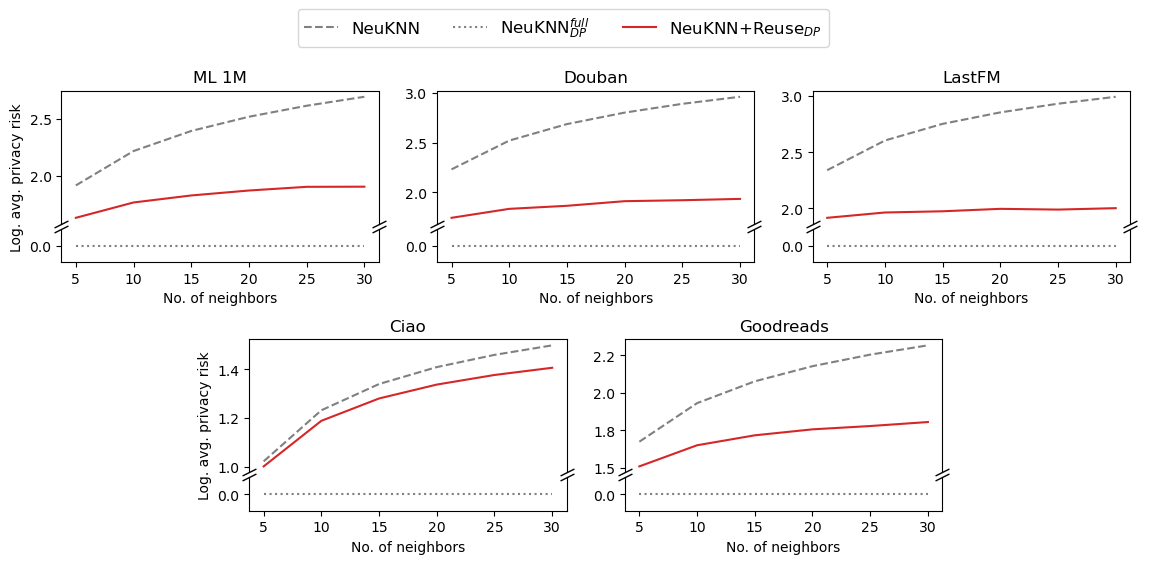

In [17]:
def plot(ax, data): 
    def split_axis(ax):
        divider = make_axes_locatable(ax)
        ax_top = divider.new_vertical(size="400%", pad=0.05)
        
        fig.add_axes(ax_top)
        ax.spines['top'].set_visible(False)
        ax_top.tick_params(bottom=False, labelbottom=False)
        ax_top.spines['bottom'].set_visible(False)
        
        ax_top.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        
        d = .5
        kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
        ax_top.plot([0, 1], [0, 0], transform=ax_top.transAxes, **kwargs)
        ax.plot([0, 1], [1, 1], transform=ax.transAxes, **kwargs)
        ax.set_yticks([0.0])
        
        return ax_top, ax
    
    ax_top, ax_bottom = split_axis(ax)
    ax_top.plot(K, np.log10(data["UserKNN"]), color="gray", linestyle="dashed")
    #ax_top.plot(K, np.log10(data["UserKNN_DP"]), color="C0")
    #ax_top.plot(K, np.log10(data["UserKNN_Static_DP"]), color="C1")
    ax_top.plot(K, np.log10(data["UserKNN_Dynamic_DP"]), color="C3")
    ax_bottom.plot(K, data["Full_DP"], color="gray", linestyle="dotted")
    
    return ax_top, ax_bottom

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=fig)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2, fig=fig)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2, fig=fig)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2, fig=fig)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2, fig=fig)
axes = [ax1, ax2, ax3, ax4, ax5]


ax = fig.add_subplot(211, frameon=False)
ax.set_ylabel("Log. avg. privacy risk")
ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
ax = fig.add_subplot(268, frameon=False)
ax.set_ylabel("Log. avg. privacy risk")
ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)

ax1_top, ax1_bottom = plot(axes[0], ml1m["privacy_risk"])
ax2_top, ax2_bottom = plot(axes[1], douban["privacy_risk"])
ax3_top, ax3_bottom = plot(axes[2], lfm["privacy_risk"])
ax4_top, ax4_bottom = plot(axes[3], ciao["privacy_risk"])
ax5_top, ax5_bottom = plot(axes[4], goodreads["privacy_risk"])

ax1_bottom.set_xlabel("No. of neighbors")
ax2_bottom.set_xlabel("No. of neighbors")
ax3_bottom.set_xlabel("No. of neighbors")
ax4_bottom.set_xlabel("No. of neighbors")
ax5_bottom.set_xlabel("No. of neighbors")
ax1_top.set_title("ML 1M")
ax2_top.set_title("Douban")
ax3_top.set_title("LastFM")
ax4_top.set_title("Ciao")
ax5_top.set_title("Goodreads")

"""lines = [Line2D([0], [0], color="gray", linestyle="dashed")] # UserKNN
lines.append(Line2D([0], [0], color="gray", linestyle='solid')) # FullDP
lines.append(Line2D([0], [0], color="C0")) # UserKNN_DP
lines.append(Line2D([0], [0], color="C1")) # UserKNN_Static_DP
lines.append(Line2D([0], [0], color="C2")) # UserKNN_Dynamic_DP
labels = ["UserKNN", r"Full$_{DP}$", r"UserKNN$_{DP}$", r"UserKNN$^{static}_{DP}$", r"UserKNN$^{dynamic}_{DP}$"]"""

lines = [Line2D([0], [0], color="gray", linestyle="dashed")] # UserKNN
lines.append(Line2D([0], [0], color="gray", linestyle='dotted')) # FullDP
lines.append(Line2D([0], [0], color="C3")) # UserKNN_Dynamic_DP
labels = ["NeuKNN", r"NeuKNN$^{full}_{DP}$", r"NeuKNN+Reuse$_{DP}$"]

fig.legend(lines, labels, ncol=5, loc='upper center', bbox_to_anchor=(0.5, .95), fontsize="large")
fig.tight_layout()
fig.subplots_adjust(top=.8, bottom=0.1, hspace=0.45, wspace=0.45)
fig.align_ylabels(axes)

plt.savefig("../../proof_plots/figure_10.tiff", dpi=400)

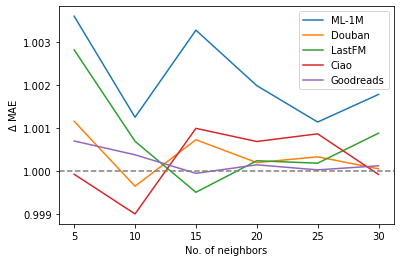

In [8]:
plt.plot(K, ml1m["mean_absolute_error"]["UserKNN_Dynamic_DP"] / ml1m["mean_absolute_error"]["UserKNN_DP"], label="ML-1M")
plt.plot(K, douban["mean_absolute_error"]["UserKNN_Dynamic_DP"] / douban["mean_absolute_error"]["UserKNN_DP"], label="Douban")
plt.plot(K, lfm["mean_absolute_error"]["UserKNN_Dynamic_DP"] / lfm["mean_absolute_error"]["UserKNN_DP"], label="LastFM")
plt.plot(K, ciao["mean_absolute_error"]["UserKNN_Dynamic_DP"] / ciao["mean_absolute_error"]["UserKNN_DP"], label="Ciao")
plt.plot(K, goodreads["mean_absolute_error"]["UserKNN_Dynamic_DP"] / goodreads["mean_absolute_error"]["UserKNN_DP"], label="Goodreads")
plt.axhline(y=1, c="gray", linestyle="dashed")
plt.ylabel(r"$\Delta$ MAE")
plt.xlabel("No. of neighbors")
plt.legend()

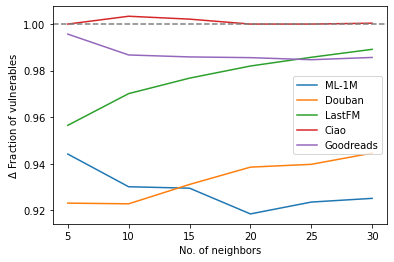

In [9]:
plt.plot(K, ml1m["fraction_vulnerables"]["UserKNN_Dynamic_DP"] / ml1m["fraction_vulnerables"]["UserKNN_DP"], label="ML-1M")
plt.plot(K, douban["fraction_vulnerables"]["UserKNN_Dynamic_DP"] / douban["fraction_vulnerables"]["UserKNN_DP"], label="Douban")
plt.plot(K, lfm["fraction_vulnerables"]["UserKNN_Dynamic_DP"] / lfm["fraction_vulnerables"]["UserKNN_DP"], label="LastFM")
plt.plot(K, ciao["fraction_vulnerables"]["UserKNN_Dynamic_DP"] / ciao["fraction_vulnerables"]["UserKNN_DP"], label="Ciao")
plt.plot(K, goodreads["fraction_vulnerables"]["UserKNN_Dynamic_DP"] / goodreads["fraction_vulnerables"]["UserKNN_DP"], label="Goodreads")
plt.axhline(y=1, c="gray", linestyle="dashed")
plt.ylabel(r"$\Delta$ Fraction of vulnerables")
plt.xlabel("No. of neighbors")
plt.legend()

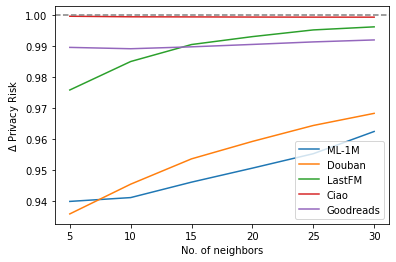

In [14]:
plt.plot(K, ml1m["privacy_risk"]["UserKNN_Dynamic_DP"] / ml1m["privacy_risk"]["UserKNN_DP"], label="ML-1M")
plt.plot(K, douban["privacy_risk"]["UserKNN_Dynamic_DP"] / douban["privacy_risk"]["UserKNN_DP"], label="Douban")
plt.plot(K, lfm["privacy_risk"]["UserKNN_Dynamic_DP"] / lfm["privacy_risk"]["UserKNN_DP"], label="LastFM")
plt.plot(K, ciao["privacy_risk"]["UserKNN_Dynamic_DP"] / ciao["privacy_risk"]["UserKNN_DP"], label="Ciao")
plt.plot(K, goodreads["privacy_risk"]["UserKNN_Dynamic_DP"] / goodreads["privacy_risk"]["UserKNN_DP"], label="Goodreads")
plt.axhline(y=1, c="gray", linestyle="dashed")
plt.ylabel(r"$\Delta$ Privacy Risk")
plt.xlabel("No. of neighbors")
plt.legend()

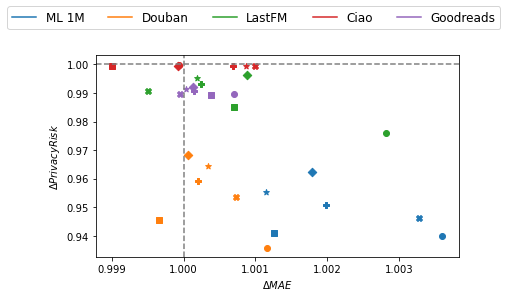

In [15]:
markers = ["o", "s", "X", "P", "*", "D"]
fig = plt.figure()
plt.axhline(y=1, c="grey", linestyle="dashed")
plt.axvline(x=1, c="grey", linestyle="dashed")
for k_idx, k in enumerate(K):
    delta_mae = ml1m["mean_absolute_error"]["UserKNN_Dynamic_DP"][k_idx] / ml1m["mean_absolute_error"]["UserKNN_DP"][k_idx]
    delta_pr = ml1m["privacy_risk"]["UserKNN_Dynamic_DP"][k_idx] / ml1m["privacy_risk"]["UserKNN_DP"][k_idx]
    plt.scatter(delta_mae, delta_pr, c="C0", marker=markers[k_idx])
    
    delta_mae = douban["mean_absolute_error"]["UserKNN_Dynamic_DP"][k_idx] / douban["mean_absolute_error"]["UserKNN_DP"][k_idx]
    delta_pr = douban["privacy_risk"]["UserKNN_Dynamic_DP"][k_idx] / douban["privacy_risk"]["UserKNN_DP"][k_idx]
    plt.scatter(delta_mae, delta_pr, c="C1", marker=markers[k_idx])
    
    delta_mae = lfm["mean_absolute_error"]["UserKNN_Dynamic_DP"][k_idx] / lfm["mean_absolute_error"]["UserKNN_DP"][k_idx]
    delta_pr = lfm["privacy_risk"]["UserKNN_Dynamic_DP"][k_idx] / lfm["privacy_risk"]["UserKNN_DP"][k_idx]
    plt.scatter(delta_mae, delta_pr, c="C2", marker=markers[k_idx])
    
    delta_mae = ciao["mean_absolute_error"]["UserKNN_Dynamic_DP"][k_idx] / ciao["mean_absolute_error"]["UserKNN_DP"][k_idx]
    delta_pr = ciao["privacy_risk"]["UserKNN_Dynamic_DP"][k_idx] / ciao["privacy_risk"]["UserKNN_DP"][k_idx]
    plt.scatter(delta_mae, delta_pr, c="C3", marker=markers[k_idx])
    
    delta_mae = goodreads["mean_absolute_error"]["UserKNN_Dynamic_DP"][k_idx] / goodreads["mean_absolute_error"]["UserKNN_DP"][k_idx]
    delta_pr = goodreads["privacy_risk"]["UserKNN_Dynamic_DP"][k_idx] / goodreads["privacy_risk"]["UserKNN_DP"][k_idx]
    plt.scatter(delta_mae, delta_pr, c="C4", marker=markers[k_idx])
    

plt.xlabel(r"$\Delta MAE$")
plt.ylabel(r"$\Delta Privacy Risk$")
#plt.xlim([0.99, 1.01])


lines = [Line2D([0], [0], color="C0")]
lines.append(Line2D([0], [0], color="C1"))
lines.append(Line2D([0], [0], color="C2"))
lines.append(Line2D([0], [0], color="C3"))
lines.append(Line2D([0], [0], color="C4"))
labels = ["ML 1M", "Douban", "LastFM", "Ciao", "Goodreads"]

fig.legend(lines, labels, ncol=5, loc='upper center', bbox_to_anchor=(0.5, .99), fontsize="large")
fig.tight_layout()
fig.subplots_adjust(top=.8, bottom=0.1, hspace=0.45, wspace=0.45)
fig.align_ylabels(axes)

In [16]:
%matplotlib inline

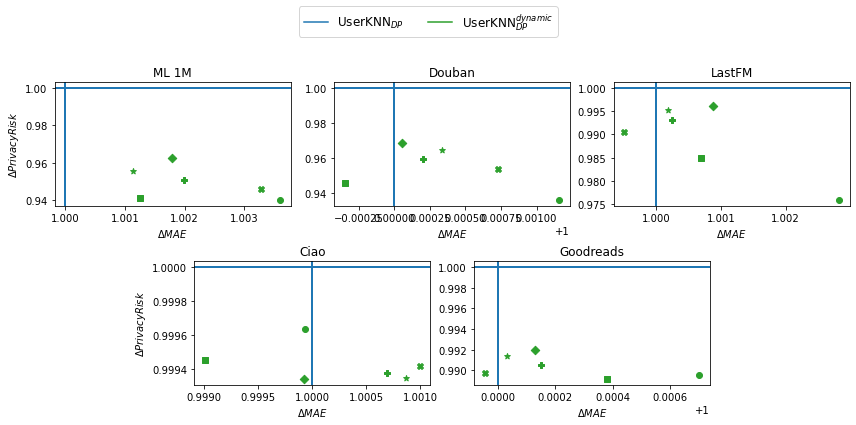

In [17]:
def plot(ax, data):
    for k_idx, k in enumerate(K):
        ax.axhline(y=1, c="C0", zorder=0)
        ax.axvline(x=1, c="C0", zorder=0)
        #delta_mae = data["mean_absolute_error"]["UserKNN"][k_idx] / data["mean_absolute_error"]["UserKNN_DP"][k_idx]
        #delta_pr = data["privacy_risk"]["UserKNN"][k_idx] / data["privacy_risk"]["UserKNN_DP"][k_idx]
        #ax.scatter(delta_mae, delta_pr, c="gray", marker=markers[k_idx], alpha=0.5)
        
        #delta_mae = data["mean_absolute_error"]["Full_DP"][k_idx] / data["mean_absolute_error"]["UserKNN_DP"][k_idx]
        #delta_pr = data["privacy_risk"]["Full_DP"][k_idx] / data["privacy_risk"]["UserKNN_DP"][k_idx]
        #ax.scatter(delta_mae, delta_pr, c="gray", marker=markers[k_idx])
        
        #delta_mae = data["mean_absolute_error"]["UserKNN_Static_DP"][k_idx] / data["mean_absolute_error"]["UserKNN_DP"][k_idx]
        #delta_pr = data["privacy_risk"]["UserKNN_Static_DP"][k_idx] / data["privacy_risk"]["UserKNN_DP"][k_idx]
        #ax.scatter(delta_mae, delta_pr, c="C1", marker=markers[k_idx])
        
        delta_mae = data["mean_absolute_error"]["UserKNN_Dynamic_DP"][k_idx] / data["mean_absolute_error"]["UserKNN_DP"][k_idx]
        delta_pr = data["privacy_risk"]["UserKNN_Dynamic_DP"][k_idx] / data["privacy_risk"]["UserKNN_DP"][k_idx]
        ax.scatter(delta_mae, delta_pr, c="C2", marker=markers[k_idx])
    
    #ax.plot(K, data["UserKNN"], color="gray", linestyle="dashed")
    #ax.plot(K, data["Full_DP"], color="gray", linestyle="solid")
    #ax.plot(K, data["UserKNN_DP"], color="C0")
    #ax.plot(K, data["UserKNN_Static_DP"], color="C1")
    #ax.plot(K, data["UserKNN_Dynamic_DP"], color="C2")

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=fig)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2, fig=fig)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2, fig=fig)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2, fig=fig)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2, fig=fig)
axes = [ax1, ax2, ax3, ax4, ax5]

plot(axes[0], ml1m)
plot(axes[1], douban)
plot(axes[2], lfm)
plot(axes[3], ciao)
plot(axes[4], goodreads)

axes[0].set_ylabel(r"$\Delta Privacy Risk$")
axes[3].set_ylabel(r"$\Delta Privacy Risk$")

axes[0].set_xlabel(r"$\Delta MAE$")
axes[1].set_xlabel(r"$\Delta MAE$")
axes[2].set_xlabel(r"$\Delta MAE$")
axes[3].set_xlabel(r"$\Delta MAE$")
axes[4].set_xlabel(r"$\Delta MAE$")
axes[0].set_title("ML 1M")
axes[1].set_title("Douban")
axes[2].set_title("LastFM")
axes[3].set_title("Ciao")
axes[4].set_title("Goodreads")

"""lines = [Line2D([0], [0], color="gray", linestyle="dashed")] # UserKNN
lines.append(Line2D([0], [0], color="gray", linestyle='solid')) # FullDP
lines.append(Line2D([0], [0], color="C0")) # UserKNN_DP
lines.append(Line2D([0], [0], color="C1")) # UserKNN_Static_DP
lines.append(Line2D([0], [0], color="C2")) # UserKNN_Dynamic_DP
labels = ["UserKNN", r"Full$_{DP}$", r"UserKNN$_{DP}$", r"UserKNN$^{static}_{DP}$", r"UserKNN$^{dynamic}_{DP}$"]"""

lines = [Line2D([0], [0], color="C0"), Line2D([0], [0], color="C2")]
labels = [r"UserKNN$_{DP}$", r"UserKNN$^{dynamic}_{DP}$"]

fig.legend(lines, labels, ncol=5, loc='upper center', bbox_to_anchor=(0.5, .99), fontsize="large")
fig.tight_layout()
fig.subplots_adjust(top=.8, bottom=0.1, hspace=0.45, wspace=0.45)
fig.align_ylabels(axes)

In [86]:
%matplotlib qt

In [88]:
def plot_mae(ax, data): 
    ax.plot(K, data["UserKNN"], color="gray", linestyle="dashed")
    ax.plot(K, data["Full_DP"], color="gray", linestyle="dotted")
    ax.plot(K, data["UserKNN_Dynamic_DP"], color="C3")

def plot_pr(ax, data): 
    def split_axis(ax):
        divider = make_axes_locatable(ax)
        ax_top = divider.new_vertical(size="400%", pad=0.05)
        
        fig.add_axes(ax_top)
        ax.spines['top'].set_visible(False)
        ax_top.tick_params(bottom=False, labelbottom=False)
        ax_top.spines['bottom'].set_visible(False)
        
        ax_top.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        
        d = .5
        kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
        ax_top.plot([0, 1], [0, 0], transform=ax_top.transAxes, **kwargs)
        ax.plot([0, 1], [1, 1], transform=ax.transAxes, **kwargs)
        ax.set_yticks([0.0])
        
        return ax_top, ax
    
    ax_top, ax_bottom = split_axis(ax)
    ax_top.plot(K, np.log10(data["UserKNN"]), color="gray", linestyle="dashed")
    ax_top.plot(K, np.log10(data["UserKNN_Dynamic_DP"]), color="C3")
    ax_bottom.plot(K, data["Full_DP"], color="gray", linestyle="dotted")
    
    return ax_top, ax_bottom

fig = plt.figure(figsize=(9, 4))
ax1 = plt.subplot2grid(shape=(1,2), loc=(0,0), fig=fig)
ax2 = plt.subplot2grid((1,2), (0,1), fig=fig)
axes = [ax1, ax2]


ax = fig.add_subplot(121, frameon=False)
ax.set_ylabel("Mean absolute error")
ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
ax = fig.add_subplot(122, frameon=False)
ax.set_ylabel("Log. avg. privacy risk")
ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)

plot_mae(axes[0], ml1m["mean_absolute_error"])
ax2_top, ax2_bottom = plot_pr(axes[1], ml1m["privacy_risk"])

ax1.set_xlabel("No. of neighbors")
ax2_bottom.set_xlabel("No. of neighbors")

lines = [Line2D([0], [0], color="gray", linestyle="dashed")] # UserKNN
lines.append(Line2D([0], [0], color="gray", linestyle='dotted')) # FullDP
lines.append(Line2D([0], [0], color="C3")) # UserKNN_Dynamic_DP
labels = ["NeuKNN", r"NeuKNN$^{full}_{DP}$", r"NeuKNN+Reuse$_{DP}$"]

fig.legend(lines, labels, ncol=5, loc='upper center', bbox_to_anchor=(0.5, .95), fontsize="large")
fig.tight_layout()
fig.subplots_adjust(top=.8, bottom=0.1, hspace=0.45, wspace=0.45)
fig.align_ylabels(axes)